## Loading Data

In [1]:
# importing required libbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('..\data\merged_data.csv')

In [2]:
# Distribution of key variables: event_type and country
# Plot event_type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='event_type')
plt.title('Distribution of Event Types')
plt.xticks(rotation=45)
plt.show()

# Plot country distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='admin_1')
plt.title('Distribution of Counties')
plt.xticks(rotation=45)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Convert 'event_date' to datetime

# Check the current format of 'event_date'
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')

# Verify conversion
print(df['event_date'].head())

# Aggregate data monthly by location and event type
monthly_data = df.groupby(['year_month', 'location', 'event_type']).agg({
    'fatalities': 'sum',
    'rainfall': 'mean',
    'value': 'mean',
    'common_unit_price': 'mean'
}).reset_index()

# Show the first few rows of the aggregated data
monthly_data.head()

In [15]:
# Market connectivity indicators
df['market_isolation'] = df.groupby('market').size().rank(ascending=False)
df['price_deviation'] = df.groupby(['cpcv2_description', 'year_month'])['value'].transform(
    lambda x: (x - x.mean()) / x.std()
)
df

,event_date,country,event_type,sub_event_type,actor1,fatalities,interaction,location,geo_precision,admin_1,...,collection_schedule,created,modified,value,common_unit_price,Month,year,rainfall,market_isolation,price_deviation
0,2024-12-31,Kenya,Protests,Peaceful protest,Protesters (Kenya),0,Protesters only,Mombasa,1,Mombasa,...,Monthly,2024-12-17T19:59:02,2024-12-27T13:42:19,2.066000,2.066000,Dec,2024,4.2088,NaN,-0.977008
1,2024-12-31,Kenya,Protests,Peaceful protest,Protesters (Kenya),0,Protesters only,Mombasa,1,Mombasa,...,Monthly,2024-12-17T20:00:08,2024-12-27T13:42:19,2.237500,2.237500,Dec,2024,4.2088,NaN,0.977008
2,2024-12-30,Kenya,Protests,Protest with intervention,Protesters (Kenya),0,State forces-Protesters,Mombasa,1,Mombasa,...,Monthly,2024-12-17T19:59:02,2024-12-27T13:42:19,2.066000,2.066000,Dec,2024,4.2088,NaN,-0.977008
3,2024-12-30,Kenya,Protests,Protest with intervention,Protesters (Kenya),0,State forces-Protesters,Mombasa,1,Mombasa,...,Monthly,2024-12-17T20:00:08,2024-12-27T13:42:19,2.237500,2.237500,Dec,2024,4.2088,NaN,0.977008
4,2024-12-28,Kenya,Protests,Peaceful protest,Protesters (Kenya),0,Protesters only,Utange,1,Mombasa,...,Monthly,2024-12-17T19:59:02,2024-12-27T13:42:19,2.066000,2.066000,Dec,2024,4.2088,NaN,-0.977008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13953,2023-07-01,Kenya,Riots,Mob violence,Rioters (Kenya),0,Rioters-Civilians,Nairobi - Roysambu,1,Nairobi,...,Monthly,2023-07-10T09:23:44,2024-12-27T13:41:45,10615.937500,117.954861,Jul,2023,4.3162,NaN,-0.386795
13954,2023-07-01,Kenya,Riots,Mob violence,Rioters (Kenya),0,Rioters-Civilians,Nairobi - Roysambu,1,Nairobi,...,Monthly,2023-07-10T09:23:43,2024-12-27T13:41:45,6783.562500,75.372917,Jul,2023,4.3162,NaN,0.662807
13955,2023-07-01,Kenya,Riots,Mob violence,Rioters (Kenya),0,Rioters-Civilians,Nairobi - Roysambu,1,Nairobi,...,Monthly,2023-07-10T09:23:43,2024-12-27T13:41:45,4197.222222,38.156566,Jul,2023,4.3162,NaN,0.338186
13956,2023-07-01,Kenya,Riots,Mob violence,Rioters (Kenya),0,Rioters-Civilians,Nairobi - Roysambu,1,Nairobi,...,Monthly,2023-07-10T09:23:44,2024-12-27T13:41:45,7360.787500,75.110077,Jul,2023,4.3162,NaN,0.770601


Generating visualizations...


C:\Users\USER\AppData\Local\Temp\ipykernel_14084\407416015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df['event_type'], order=df['event_type'].value_counts().index, palette='viridis')


Saved 'event_type_distribution.png'


C:\Users\USER\AppData\Local\Temp\ipykernel_14084\407416015.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=unique_events['admin_1'], order=unique_events['admin_1'].value_counts().index, palette='plasma')


Saved 'events_by_county.png'
Saved 'maize_price_distribution.png'
Saved 'rainfall_vs_price.png'

All visualizations have been successfully generated and saved.


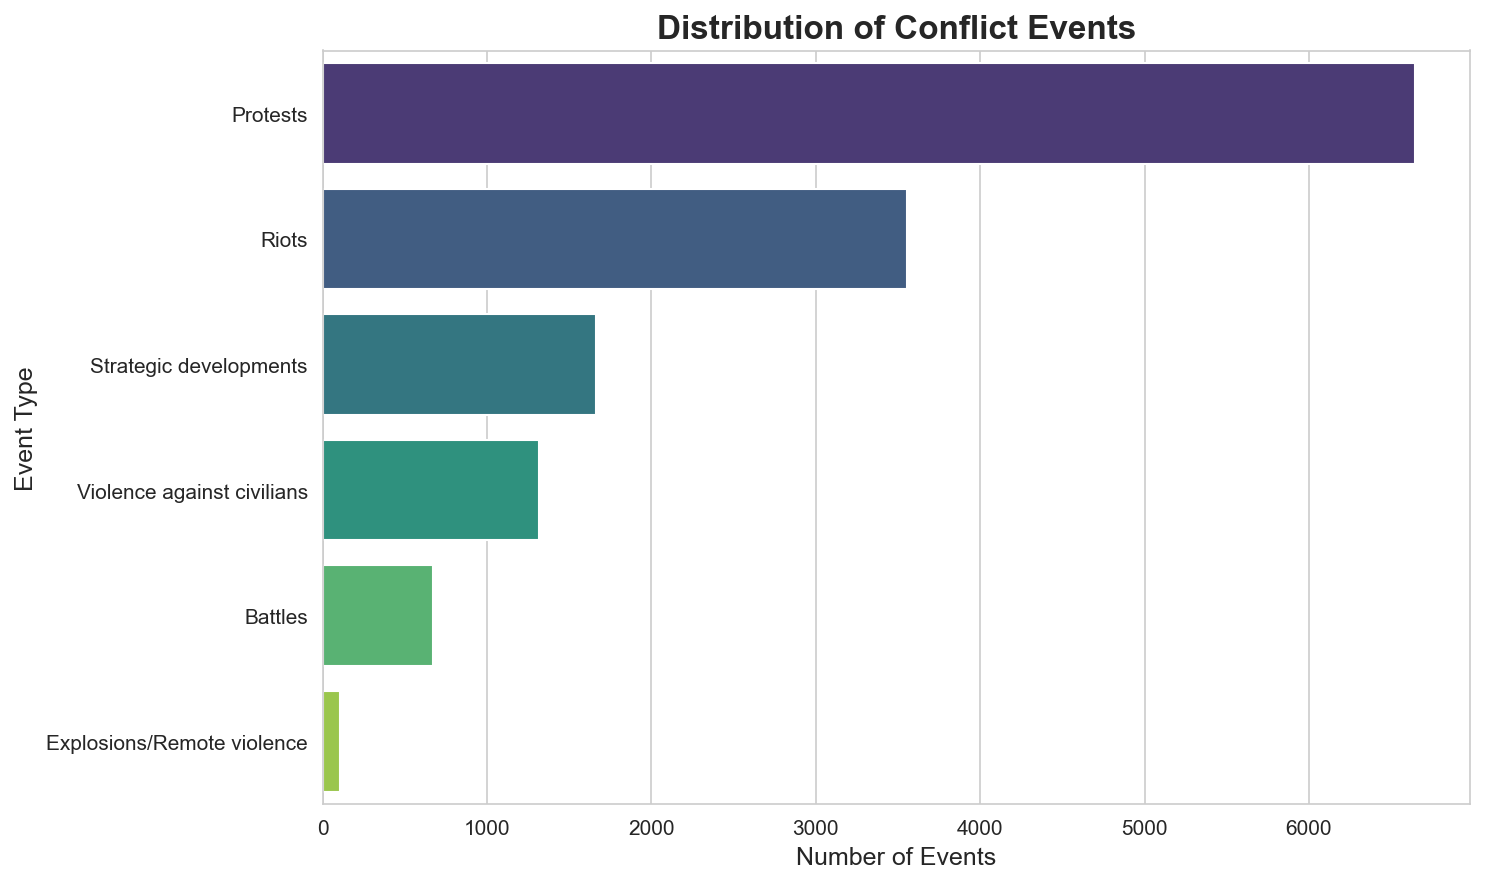

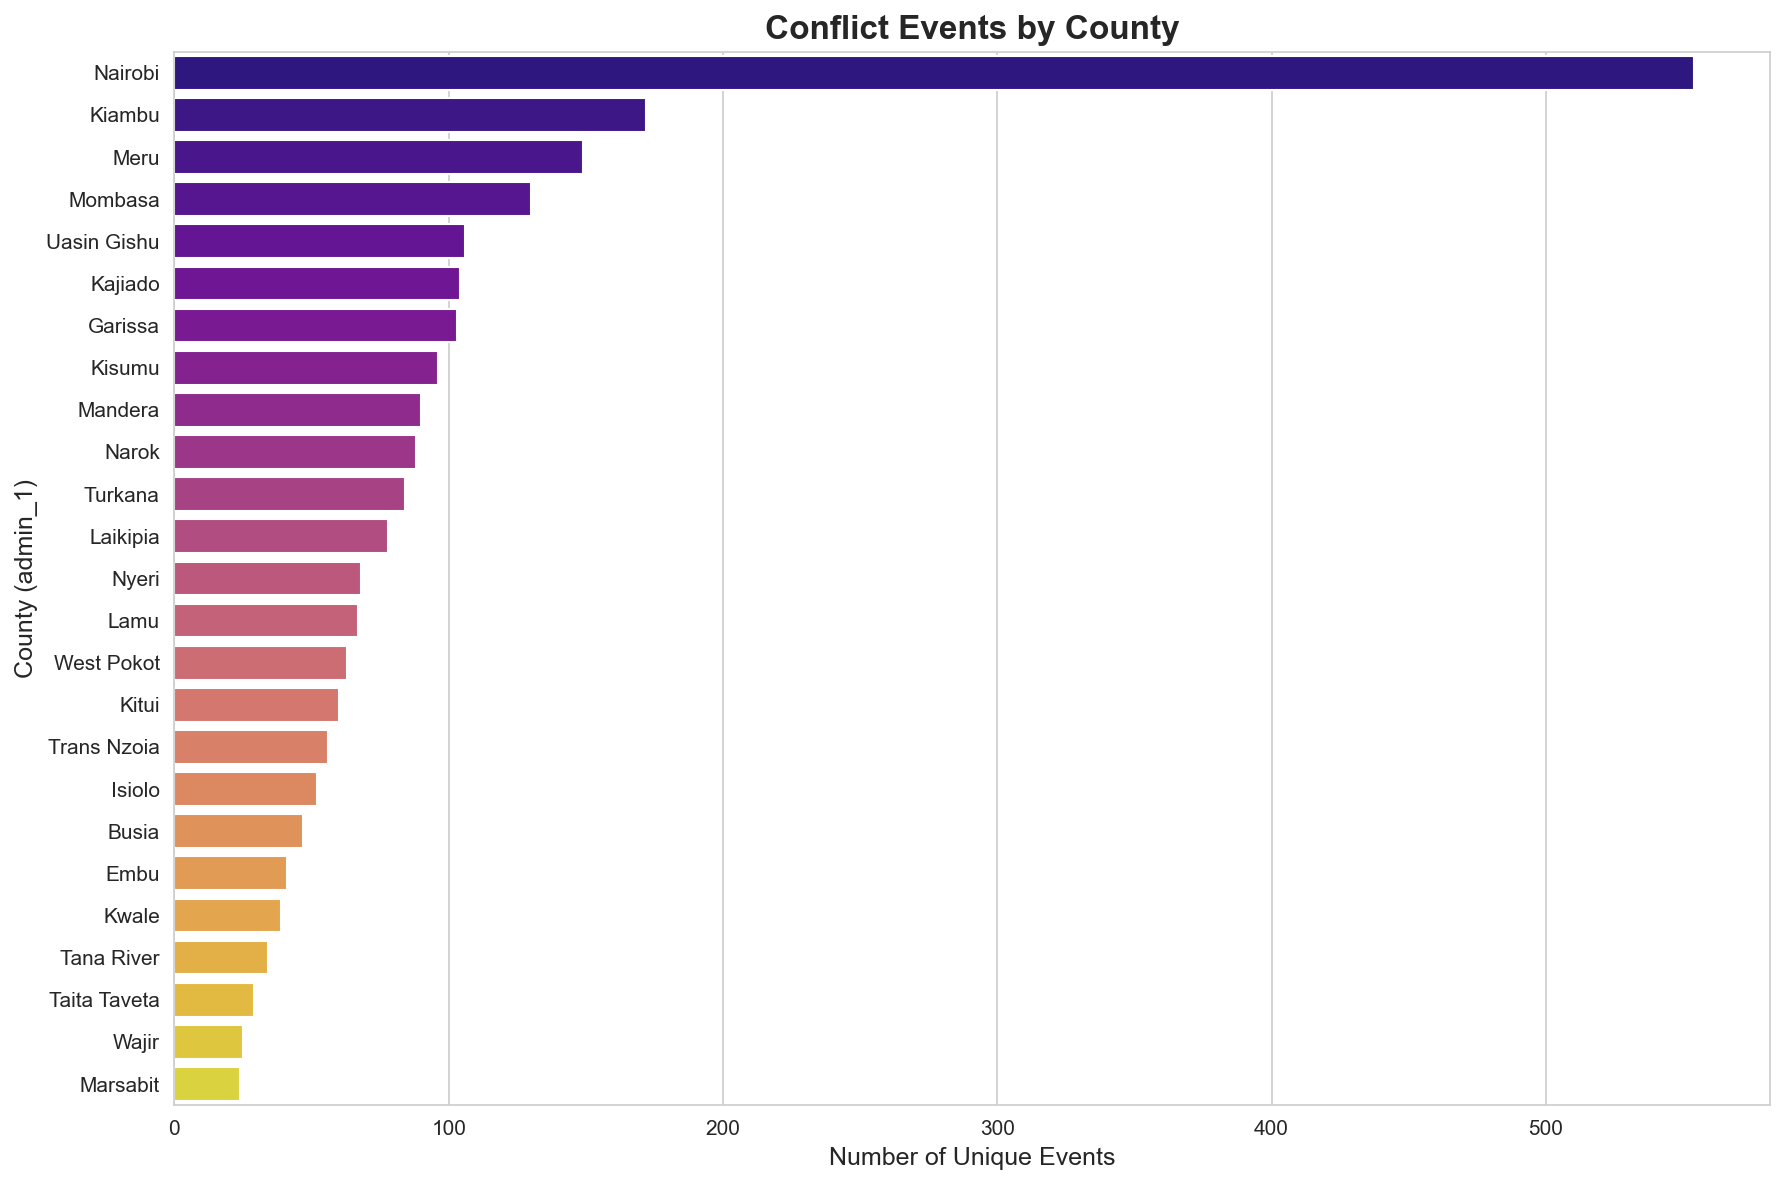

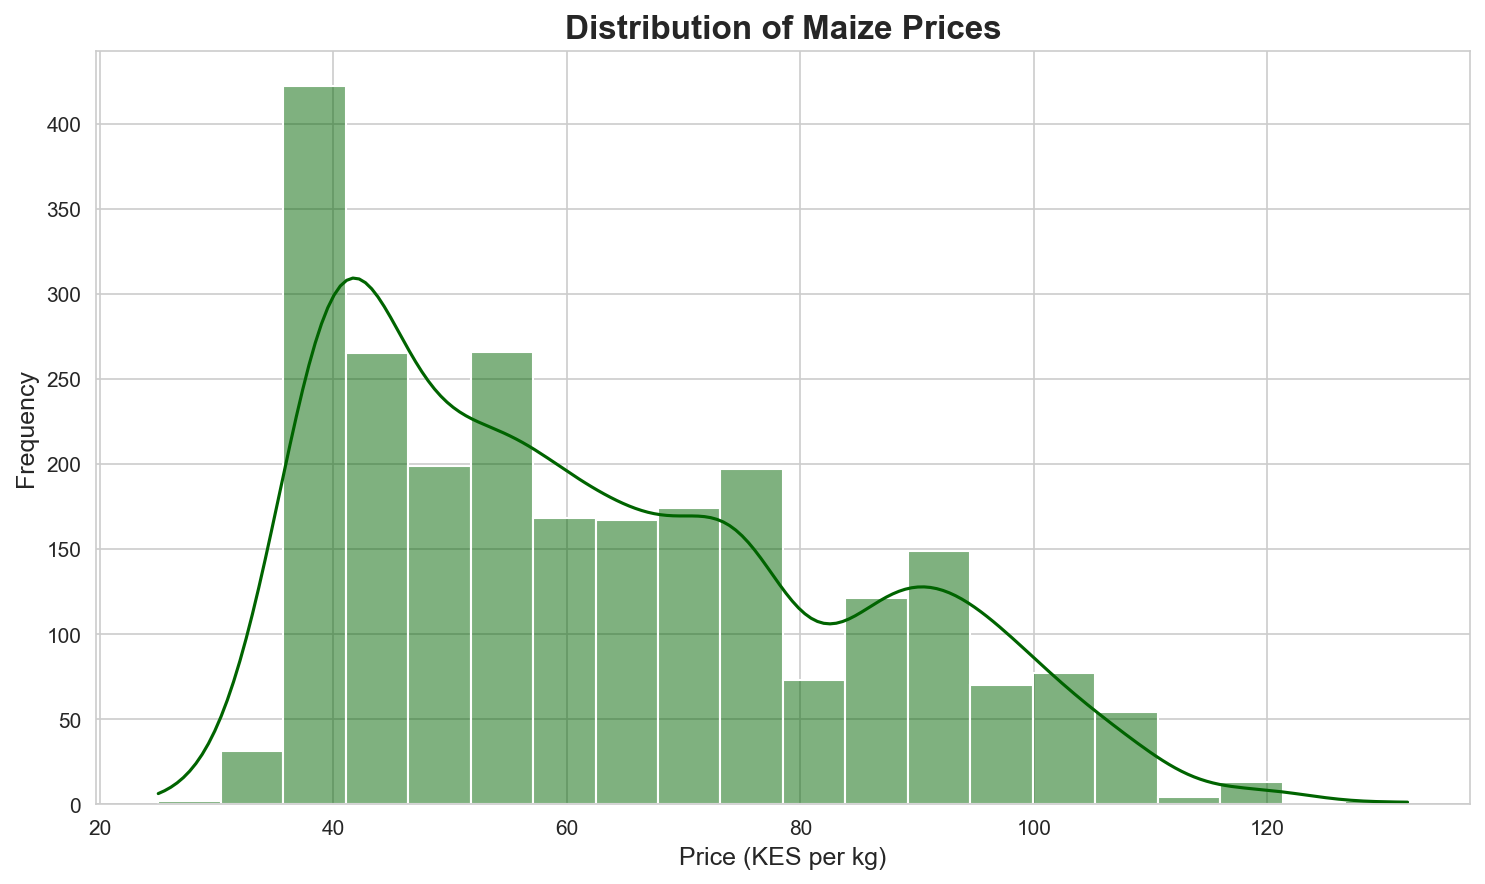

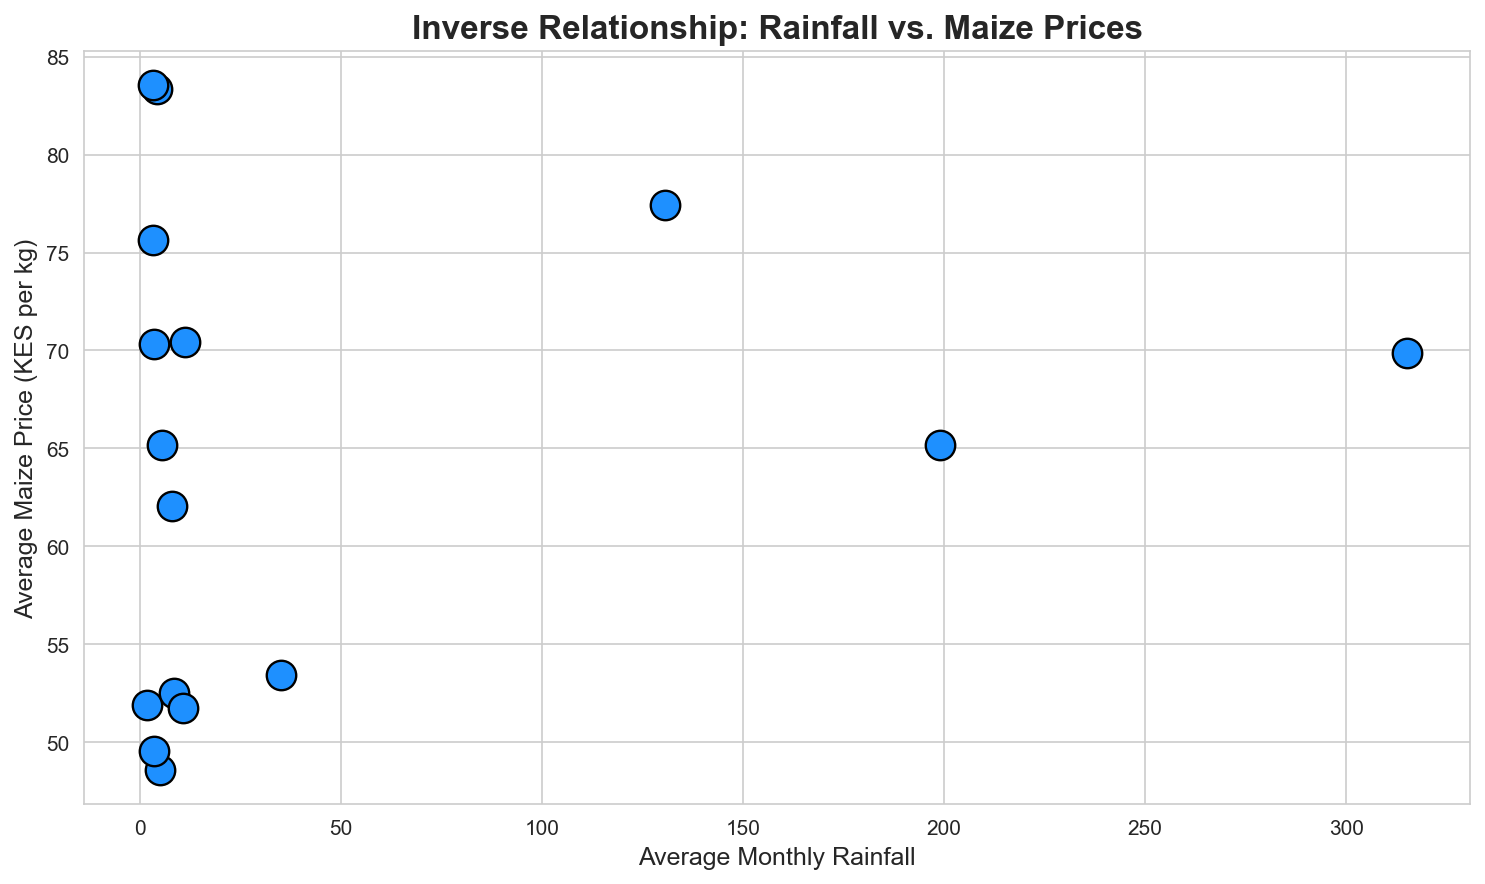

In [17]:

# --- Step 2: Generate Visualizations ---
print("Generating visualizations...")
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150 # Set high DPI for better quality images

# 1. Distribution of Conflict Events
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=df['event_type'], order=df['event_type'].value_counts().index, palette='viridis')
plt.title('Distribution of Conflict Events', fontsize=16, weight='bold')
plt.xlabel('Number of Events', fontsize=12)
plt.ylabel('Event Type', fontsize=12)
plt.tight_layout()
plt.savefig('event_type_distribution.png')
print("Saved 'event_type_distribution.png'")

# 2. Conflict Events by County
# Use unique events to avoid overcounting due to multiple food items per event
unique_events = df.drop_duplicates(subset=['event_date', 'location', 'event_type'])
plt.figure(figsize=(12, 8))
sns.countplot(y=unique_events['admin_1'], order=unique_events['admin_1'].value_counts().index, palette='plasma')
plt.title('Conflict Events by County', fontsize=16, weight='bold')
plt.xlabel('Number of Unique Events', fontsize=12)
plt.ylabel('County (admin_1)', fontsize=12)
plt.tight_layout()
plt.savefig('events_by_county.png')
print("Saved 'events_by_county.png'")


# 3. Distribution of Maize Prices
maize_prices = df[df['cpcv2_description'].str.contains("Maize", na=False)]
plt.figure(figsize=(10, 6))
sns.histplot(maize_prices['common_unit_price'], kde=True, bins=20, color='darkgreen')
plt.title('Distribution of Maize Prices', fontsize=16, weight='bold')
plt.xlabel('Price (KES per kg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('maize_price_distribution.png')
print("Saved 'maize_price_distribution.png'")


# 4. Rainfall vs. Maize Prices
maize_prices_by_month = maize_prices.groupby('year_month').agg(
    avg_rainfall=('rainfall', 'mean'),
    avg_maize_price=('common_unit_price', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=maize_prices_by_month, x='avg_rainfall', y='avg_maize_price', s=200, color='dodgerblue', edgecolor='black')
plt.title('Inverse Relationship: Rainfall vs. Maize Prices', fontsize=16, weight='bold')
plt.xlabel('Average Monthly Rainfall', fontsize=12)
plt.ylabel('Average Maize Price (KES per kg)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('rainfall_vs_price.png')
print("Saved 'rainfall_vs_price.png'")

print("\nAll visualizations have been successfully generated and saved.")

Starting feature engineering...


C:\Users\USER\AppData\Local\Temp\ipykernel_14084\39088366.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  severity_df = df.groupby(['admin_1', 'year_month']).apply(get_conflict_severity).reset_index(name='conflict_severity_index')


Defining the target variable...
Running feature importance analysis...

Top 10 Most Relevant Features:
                    feature  importance
3          avg_price_staple    0.267506
4   price_volatility_staple    0.245561
24            admin_1_Narok    0.131803
8   conflict_severity_index    0.066853
7    fatalities_rolling_avg    0.062284
5            rainfall_lag_1    0.048918
2               event_count    0.046225
1                fatalities    0.044412
6          fatalities_lag_1    0.040031
0                  rainfall    0.040020


C:\Users\USER\AppData\Local\Temp\ipykernel_14084\39088366.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importances.head(15), palette='inferno')



Saved 'feature_importance.png'
Analysis complete.


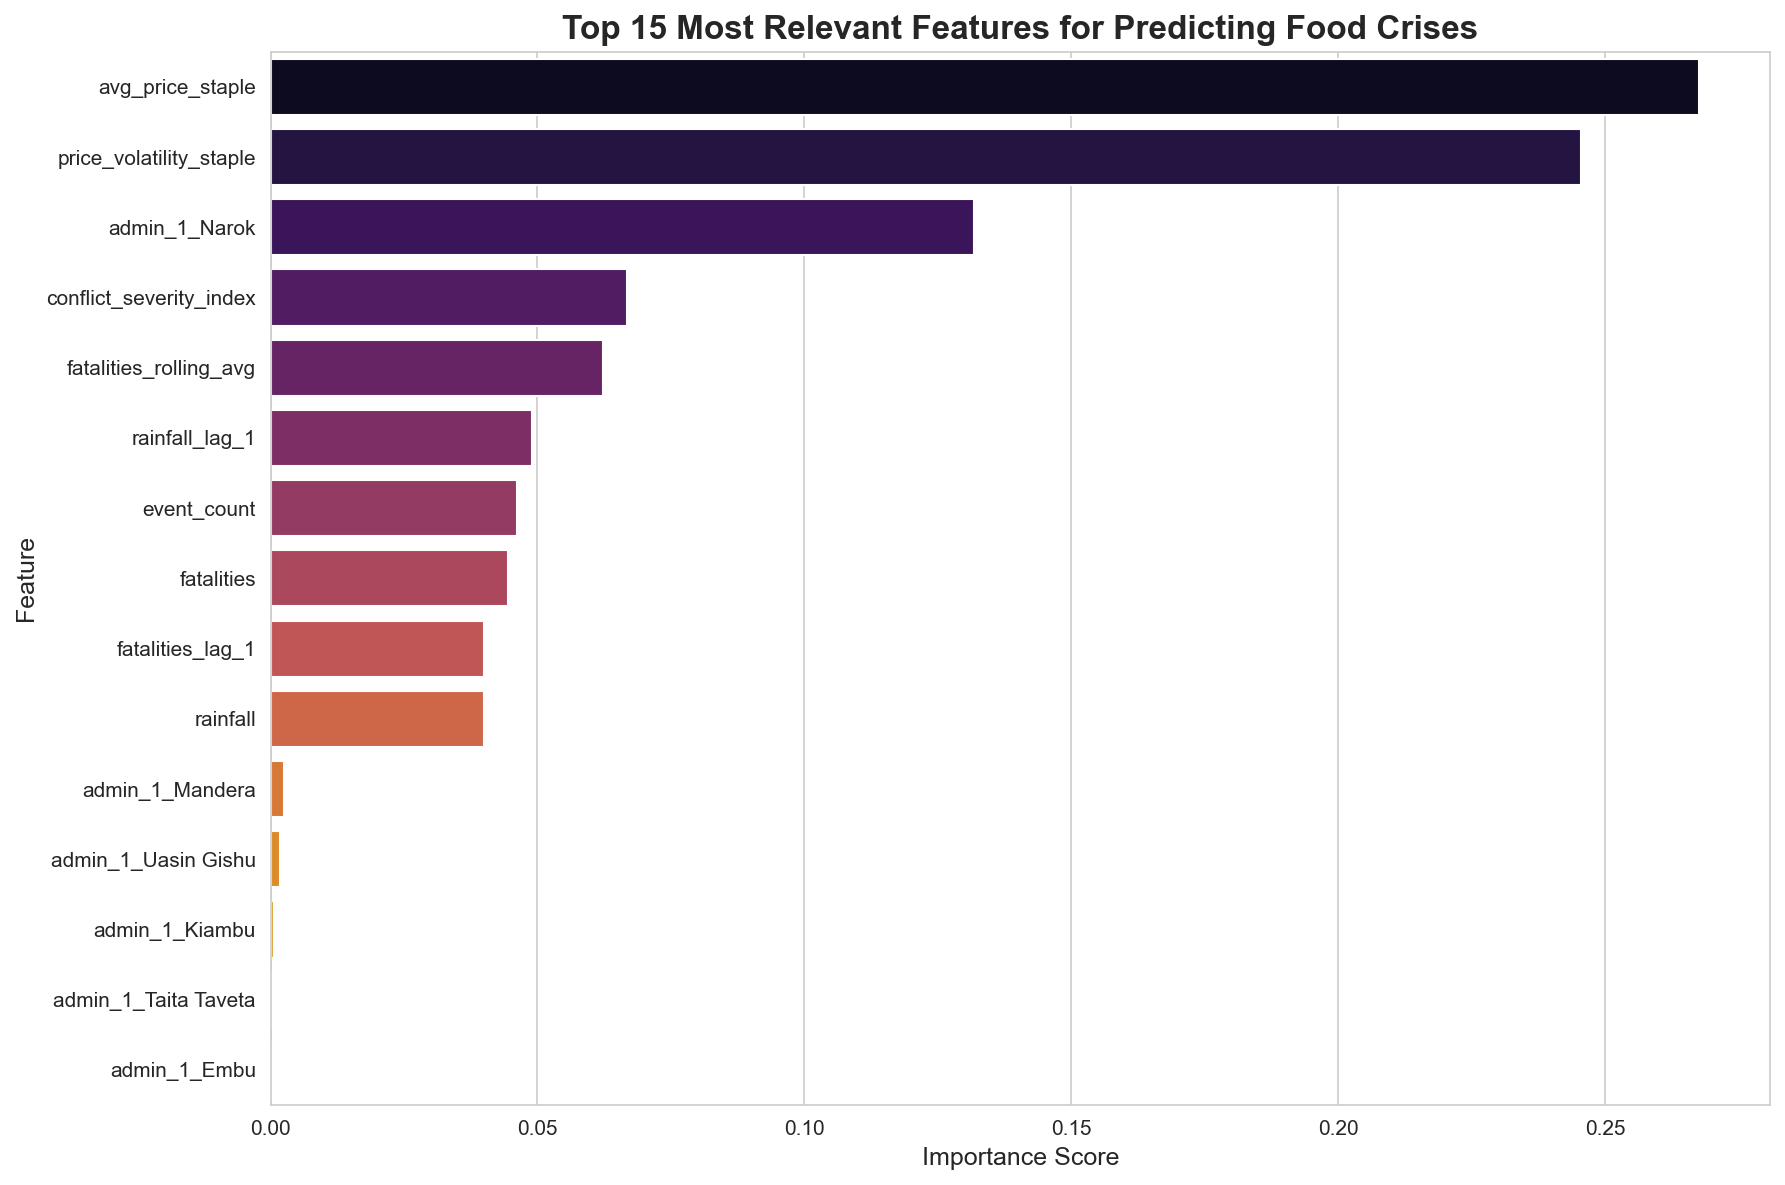

In [20]:


# --- Step 2: Feature Engineering ---
print("Starting feature engineering...")

# Aggregate data to the county-month level, which is the correct grain for our analysis
df_agg = df.groupby(['admin_1', 'year_month']).agg(
    rainfall=('rainfall', 'mean'),
    fatalities=('fatalities', 'sum'),
    event_count=('event_type', 'count'),
    avg_price_staple=('common_unit_price', lambda x: x[df['is_staple_food']].mean()),
    price_volatility_staple=('common_unit_price', lambda x: x[df['is_staple_food']].std())
).reset_index()

# a) Time-Lagged Features (Shift data to use past information)
df_agg = df_agg.sort_values(by=['admin_1', 'year_month'])
df_agg['rainfall_lag_1'] = df_agg.groupby('admin_1')['rainfall'].shift(1)
df_agg['fatalities_lag_1'] = df_agg.groupby('admin_1')['fatalities'].shift(1)

# b) Rolling Statistics (Capture trends over a window)
df_agg['fatalities_rolling_avg'] = df_agg.groupby('admin_1')['fatalities'].rolling(window=2, min_periods=1).mean().reset_index(0, drop=True)

# c) Conflict Severity Index
def get_conflict_severity(df_group):
    severity_weights = {'Battles': 5, 'Violence against civilians': 4, 'Riots': 3, 'Protests': 1, 'Strategic developments': 2}
    # Calculate a weighted sum of events in that group
    severity_score = sum(df_group['event_type'].map(severity_weights).fillna(0))
    return severity_score

severity_df = df.groupby(['admin_1', 'year_month']).apply(get_conflict_severity).reset_index(name='conflict_severity_index')
df_agg = pd.merge(df_agg, severity_df, on=['admin_1', 'year_month'], how='left')


# --- Step 3: Define the Target Variable ---
print("Defining the target variable...")
# A "crisis" is where staple food prices are above the 75th percentile AND a violent event occurred.
price_threshold = df_agg['avg_price_staple'].quantile(0.75)
df_agg['is_high_price'] = df_agg['avg_price_staple'] > price_threshold

# Check for violent events (Severity > 3)
df_agg['has_violent_conflict'] = df_agg['conflict_severity_index'] > 3

# Target variable: 1 if both conditions are met, 0 otherwise
df_agg['food_crisis_risk'] = ((df_agg['is_high_price']) & (df_agg['has_violent_conflict'])).astype(int)

# For prediction, the target must be in the future. We use this month's data to predict next month's crisis.
df_agg['food_crisis_risk'] = df_agg.groupby('admin_1')['food_crisis_risk'].shift(-1)


# --- Step 4: Feature Importance Analysis ---
print("Running feature importance analysis...")

# Prepare data for the model
# One-hot encode categorical features
df_model = pd.get_dummies(df_agg, columns=['admin_1'], drop_first=True)

# Drop rows with NaN values created by shifting/rolling
df_model = df_model.dropna(subset=['food_crisis_risk', 'rainfall_lag_1'])

# Define features (X) and target (y)
X = df_model.drop(columns=['year_month', 'food_crisis_risk', 'is_high_price', 'has_violent_conflict'])
y = df_model['food_crisis_risk']

# Handle any remaining NaNs in features by filling with the median
X = X.fillna(X.median())

# Train a RandomForest model to find feature importances
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get and display feature importances
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Relevant Features:")
print(importances.head(10))


# --- Step 5: Visualize Feature Importances ---
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importances.head(15), palette='inferno')
plt.title('Top 15 Most Relevant Features for Predicting Food Crises', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance.png')
print("\nSaved 'feature_importance.png'")
print("Analysis complete.")

In [24]:
import numpy as np

# Create severity levels based on fatalities
monthly_data['severity'] = pd.cut(
    monthly_data['fatalities'], 
    bins=[-np.inf, 0, 5, 20, np.inf], 
    labels=['secure', 'stressed', 'crisis', 'emergency'])

# Check the distribution of severity levels
severity_counts = monthly_data['severity'].value_counts()
severity_counts

severity
secure       1377
stressed      160
crisis        158
emergency      30
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode severity labels
le = LabelEncoder()
y = le.fit_transform(monthly_data['severity'])

# Select features for classification
X = monthly_data[['fatalities', 'rainfall', 'value', 'common_unit_price']]

# Drop rows with missing values
X = X.dropna()
y = y[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1380, 4), (345, 4), (1380,), (345,))

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Show feature importance
importance_df

,feature,importance
0,fatalities,0.941217
3,common_unit_price,0.028484
2,value,0.021010
1,rainfall,0.009289


              precision    recall  f1-score   support

      crisis       0.97      1.00      0.99        34
   emergency       1.00      0.75      0.86         4
      secure       1.00      1.00      1.00       275
    stressed       1.00      1.00      1.00        32

    accuracy                           1.00       345
   macro avg       0.99      0.94      0.96       345
weighted avg       1.00      1.00      1.00       345



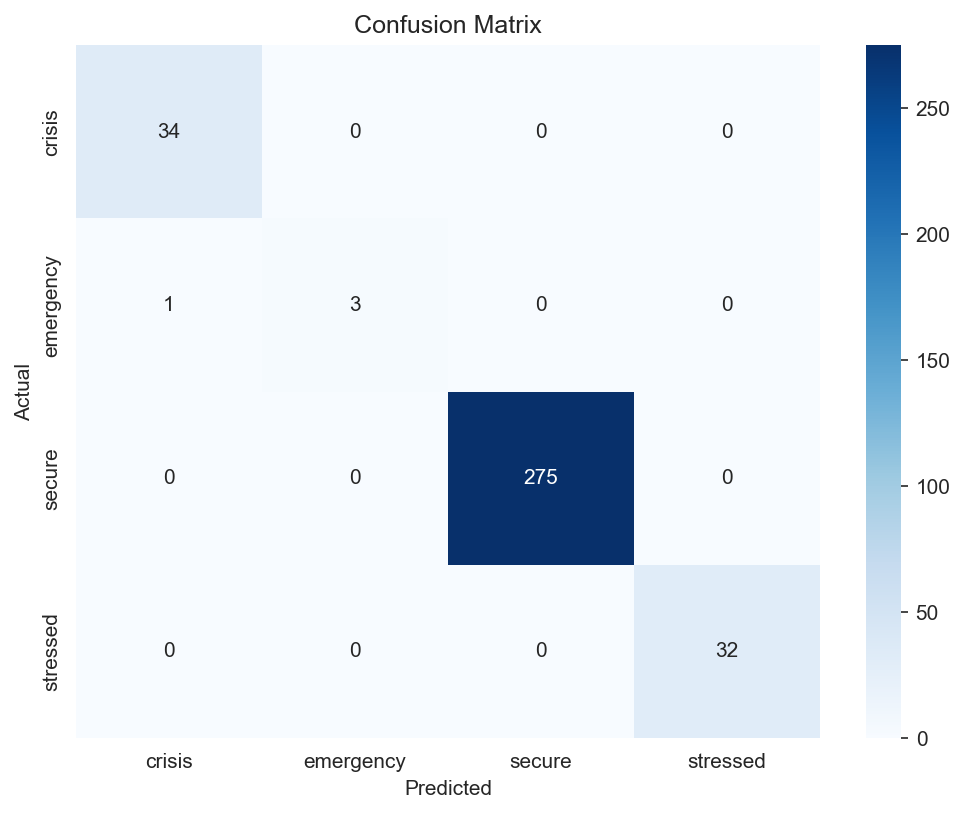

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=le.classes_)
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def plot_corr_heatmap_raw(d: pd.DataFrame):
    num_cols = d.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) < 1:
        print("[skip] correlation heatmap: fewer than 2 numeric columns.")
        return
    corr = d[num_cols].corr()
    plt.figure()
    plt.imshow(corr, interpolation="nearest")
    plt.title("Correlation matrix (RAW numeric columns)")
    plt.xticks(range(len(num_cols)), num_cols, rotation=45)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    
plot_corr_heatmap_raw(df)

In [ ]:
def plot_time_scatter(d: pd.DataFrame, time_col: str, y_col: str, group_col: str, topn_groups: int = 3):
    """Scatter of raw points (no aggregation) for top-N groups by row count."""
    for c in (time_col, y_col, group_col):
        if c not in d.columns:
            print(f"[skip] time scatter: '{c}' not found.")
            return
    top_groups = d[group_col].value_counts().head(topn_groups).index.tolist()
    for g in top_groups:
        sub = d[d[group_col] == g].copy()
        sub[time_col] = pd.to_datetime(sub[time_col], errors="coerce")
        sub[y_col] = pd.to_numeric(sub[y_col], errors="coerce")
        sub = sub.dropna(subset=[time_col, y_col]).sort_values(time_col)
        if sub.empty:
            print(f"[skip] time scatter: no data for {group_col}={g}")
            continue
        plt.figure()
        plt.plot(sub[time_col], sub[y_col], linestyle="", marker="o", markersize=3)
        plt.title(f"{y_col} over time — {group_col}: {g}")
        plt.xlabel(time_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
plot_time_scatter(df, "year_month", "common_unit_price", "market", topn_groups=3)
# Rainfall by admin_1 (top-3)
plot_time_scatter(df, "year_month", "rainfall", "admin_1", topn_groups=3)